# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
# Verificando máximos e mínimos da coluna munResLat

print(sinasc_raw['munResLat'].max())
print(sinasc_raw['munResLat'].min())

-8.76889
-13.49976


In [5]:
# Cortando a coluna munResLat em duas

sinasc_cut_a = pd.cut(sinasc_raw['munResLat'], [-14, -10.5, -8])

In [6]:
# Utilizaremos as seguintes variáveis numéricas: SEMAGESTAC APGAR1

sinasc_raw[['SEMAGESTAC', 'APGAR1']].groupby(sinasc_cut_a).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

SEMAGESTAC                                                 \
                     Soma      Média Mínima Máxima Mediana Desvio Padrão   
munResLat                                                                  
(-14.0, -10.5]   482665.0  38.545360   19.0   45.0    39.0      2.012435   
(-10.5, -8.0]    511951.0  38.588302   21.0   45.0    39.0      2.020722   

                            APGAR1                                  \
               Variância      Soma     Média Mínima Máxima Mediana   
munResLat                                                            
(-14.0, -10.5]  4.049895  104590.0  8.070216    0.0   10.0     8.0   
(-10.5, -8.0]   4.083319  114559.0  8.199771    0.0   10.0     8.0   

                                        
               Desvio Padrão Variância  
munResLat                               
(-14.0, -10.5]      0.960767  0.923073  
(-10.5, -8.0]       1.002839  1.005686

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
# Verificando máximos e mínimos da coluna munResArea

print(sinasc_raw['munResArea'].max())
print(sinasc_raw['munResArea'].min())

34096.394
459.978


In [8]:
# Cortando a coluna munResArea em duas

sinasc_cut_b = pd.cut(sinasc_raw['munResArea'], [450, 3000, 35000])

In [9]:
# Utilizaremos as seguintes variáveis numéricas: CONSPRENAT QTDGESTANT

sinasc_raw[['CONSPRENAT', 'QTDGESTANT']].groupby(sinasc_cut_b).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

CONSPRENAT                                                \
                    Soma     Média Mínima Máxima Mediana Desvio Padrão   
munResArea                                                               
(450, 3000]      44775.0  8.709395    0.0   99.0     8.0      4.290017   
(3000, 35000]   170662.0  8.143825    0.0   99.0     8.0      5.325530   

                         QTDGESTANT                                  \
               Variância       Soma     Média Mínima Máxima Mediana   
munResArea                                                            
(450, 3000]    18.404248     5870.0  1.134300    0.0    9.0     1.0   
(3000, 35000]  28.361275    27046.0  1.310368    0.0   52.0     1.0   

                                       
              Desvio Padrão Variância  
munResArea                             
(450, 3000]        1.208914  1.461473  
(3000, 35000]      1.447429  2.095052

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
# Verificando a coluna munResAlt

sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [11]:
# Cortando a coluna munResAlt em quatro

sinasc_cut_c = pd.cut(sinasc_raw['munResAlt'], [84, 87, 153, 191, 596])

In [12]:
# Utilizaremos as seguintes variáveis numéricas: QTDPARTNOR QTDPARTCES

sinasc_raw[['QTDPARTNOR', 'QTDPARTCES']].groupby(sinasc_cut_c).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

QTDPARTNOR                                                          \
                 Soma     Média Mínima Máxima Mediana Desvio Padrão Variância   
munResAlt                                                                       
(84, 87]       6024.0  0.801917    0.0   40.0     0.0      1.380931  1.906970   
(87, 153]      3283.0  0.744107    0.0   14.0     0.0      1.330296  1.769689   
(153, 191]     2915.0  0.423877    0.0    9.0     0.0      0.917432  0.841681   
(191, 596]     2349.0  0.370096    0.0   41.0     0.0      1.116704  1.247029   

           QTDPARTCES                                                          
                 Soma     Média Mínima Máxima Mediana Desvio Padrão Variância  
munResAlt                                                                      
(84, 87]       3364.0  0.448773    0.0   12.0     0.0      0.735847  0.541471  
(87, 153]      2333.0  0.519368    0.0    4.0     0.0      0.736689  0.542711  
(153, 191]     3563.0  0.517727    0.0   12.0     0.0      0.750559  0.563339  
(191, 596]     3876.0  0.608860    0.0    5.0     0.0      0.751648  0.564974

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [13]:
# Criando o filtro para cada região imediata

sinasc_imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [14]:
# Criando coluna MES

sinasc_raw.loc[:,'DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw.set_index('DTNASC', inplace=True)
sinasc_raw['MES'] = sinasc_raw.index.month

In [15]:
sinasc_a = sinasc_raw.set_index('munResNome')

In [16]:
sinasc_table_a = sinasc_a.pivot_table(values=['IDADEMAE'],
                     index=['MES'],
                     columns=[sinasc_imediatas],
                     aggfunc={'IDADEMAE': 'mean'})
sinasc_table_a

IDADEMAE                                                        
munResNome  Ariquemes     Cacoal       Jaru  Ji-Paraná Porto Velho    Vilhena
MES                                                                          
1           24.866412  26.350543  26.086667  25.792056   26.017668  26.665049
2           25.316239  25.969444  25.586777  26.417949   26.215000  26.781818
3           25.288660  26.319410  26.215686  25.490364   26.347207  26.386667
4           25.411972  26.235149  25.291667  26.075862   26.172336  26.686099
5           25.410256  26.031008  25.187050  25.931264   25.830470  25.586207
6           26.652510  25.845333  26.055944  26.272727   26.421628  26.526627
7           24.973783  26.780488  24.611111  25.809399   26.139903  26.373057
8           25.684615  26.539106  25.864865  25.938144   26.070588  26.297436
9           25.561644  26.779126  25.748299  25.640177   25.966435  26.407407
10          25.736111  26.335878  26.453125  26.246341   25.886473  26.161435
11          25.765432  26.770053  25.242424  27.313316   26.394737  26.169725
12          24.821577  26.207071  25.967105  26.482289   26.575567  27.010753

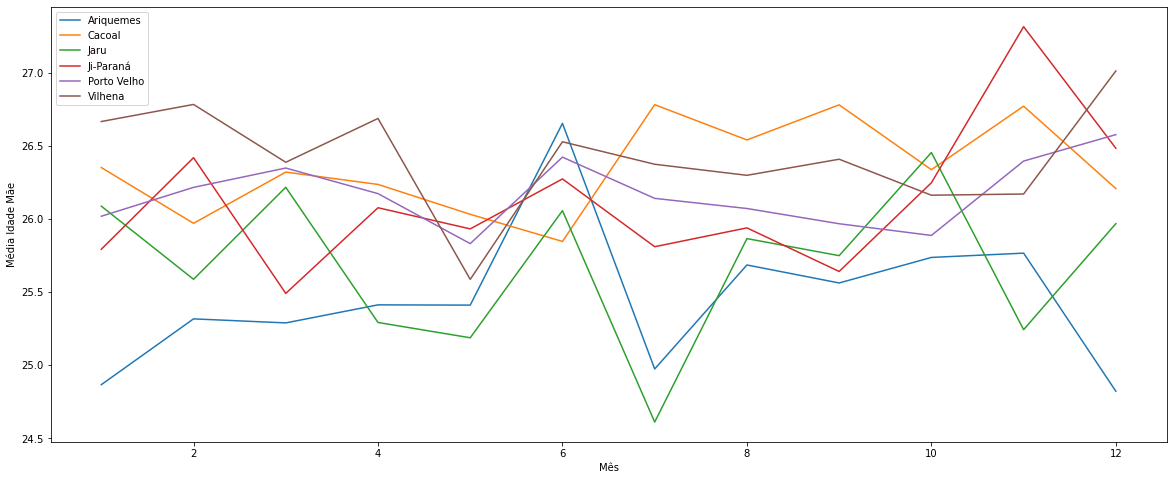

In [17]:
# Fazendo o gráfico

sinasc_table_a.plot(figsize=[20,8])

plt.xlabel('Mês')
plt.ylabel('Média Idade Mãe')
plt.legend(['Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho', 'Vilhena']);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


Aqui optei por uma análise da média dos seguintes valores numéricos:
IDADEMAE, QTDFILVIVO, QTDFILMORT, APGAR1, APGAR5, PESO, QTDPARTNOR, QTDPARTCES, IDADEPAI, CONSPRENAT.

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [18]:
sinasc_idh = {
    "Nova Mamoré": "IDH-M baixo",
    "Candeias do Jamari": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Porto Velho": "IDH-M alto",
    "Alto Paraíso": "IDH-M médio",
    "Ariquemes": "IDH-M alto",
    "Buritis": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
    "Alvorada D'Oeste": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M médio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Cacoal": "IDH-M alto",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Castanheiras": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Vilhena": "IDH-M alto",
    "Cabixi": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio"
}

In [19]:
sinasc_b = sinasc_raw.set_index('munResNome')

In [20]:
sinasc_table_b = sinasc_b.pivot_table(values=['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT'],
                     index=[sinasc_idh],
                     aggfunc='mean')
sinasc_table_b

,APGAR1,APGAR5,CONSPRENAT,IDADEMAE,IDADEPAI,PESO,QTDFILMORT,QTDFILVIVO,QTDPARTCES,QTDPARTNOR
munResNome,,,,,,,,,,
IDH-M alto,8.172839,9.171668,8.239692,26.280332,31.074091,3245.623791,0.272297,1.033960,0.499454,0.578495
IDH-M baixo,8.017014,9.172527,8.156951,25.326944,30.617450,3231.456188,0.249406,1.072664,0.488979,0.662162
IDH-M médio,8.092265,9.195668,8.307307,25.884855,31.207092,3240.847592,0.258667,1.088847,0.568660,0.563303


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [21]:
sinasc_ifdm = {
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Porto Velho": "Desenvolvimento moderado",
    "Alto Paraíso": "Desenvolvimento regular",
    "Ariquemes": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Pimenteiras do Oeste": "Desenvolvimento moderado"
}

In [22]:
sinasc_table_c = sinasc_b.pivot_table(values=['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT'],
                     index=[sinasc_ifdm],
                     aggfunc='mean')
sinasc_table_c

,APGAR1,APGAR5,CONSPRENAT,IDADEMAE,IDADEPAI,PESO,QTDFILMORT,QTDFILVIVO,QTDPARTCES,QTDPARTNOR
munResNome,,,,,,,,,,
Desenvolvimento moderado,8.165463,9.185394,8.323339,26.223139,31.061687,3243.420532,0.270330,1.027298,0.517966,0.553020
Desenvolvimento regular,8.016209,9.152066,7.964459,25.535131,31.237509,3242.203306,0.250616,1.164372,0.531098,0.688431


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [23]:
sinasc_pib = {
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Ariquemes": "Acima de 1 Bilhão",
    "Buritis": "Acima de 500 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão",
    "Cabixi": "Acima de 100 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões"
}

In [24]:
sinasc_table_d = sinasc_b.pivot_table(values=['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT'],
                     index=[sinasc_pib],
                     aggfunc='mean')
sinasc_table_d

,APGAR1,APGAR5,CONSPRENAT,IDADEMAE,IDADEPAI,PESO,QTDFILMORT,QTDFILVIVO,QTDPARTCES,QTDPARTNOR
munResNome,,,,,,,,,,
Acima de 1 Bilhão,8.167346,9.166223,8.291353,26.265562,31.108387,3247.215719,0.270229,1.026435,0.499939,0.569137
Acima de 100 Milhões,8.045782,9.168210,8.690614,25.662910,31.602102,3248.526639,0.237474,1.001561,0.530058,0.475967
Acima de 200 Milhões,8.110497,9.265193,8.042313,25.323204,30.386441,3231.439227,0.238829,1.000000,0.566517,0.540373
Acima de 300 Milhões,7.955295,9.078275,8.402576,25.833511,30.183386,3225.818617,0.233261,0.996774,0.553043,0.465304
Acima de 500 Milhões,8.156886,9.272004,7.852373,25.782528,31.322907,3239.456087,0.297597,1.234191,0.572119,0.751821
Até 100 Milhões,7.969838,9.132251,8.541176,26.515081,31.585185,3186.264501,0.162736,1.000000,0.582160,0.442623


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

**Item 1**: Os dados obtidos nas diferentes latitudes não dizem muito, pois os resultados acabam sendo muito próximos. APGAR1 médio é um pouco maior em latitudes maiores que -10.5.

**Item 2**: Aqui observamos o padrão que muito mais consultas de pré natal foram feitas em municípios com mais de 3000 m² de área, porém nos munícipio com área menor do que 3000m² a média de consultas pré natal por grávida foi maior.
Observamos também uma maior média de gestações anteriores nos municípios com mais de 3000m² de área.

**Item 3**: Aqui obsermos um fenómeno interessante, quanto menor a altitude do município, maior a média de partos normais. E o inverso é real, quanto maior a altitude, maior a média de partos cesáreos.

**Item 4**: Infelizmente os dados no gráfico não apresentaram nehuma tendência aparente para retirarmos conclusões.

**Item 5.1**: Observando os dados podemos tirar algumas informações. Média de idade do pai sempre superior a da mãe, quantidade de cesárias maior em IDH-M médio, quantidade de partos normais maior em IDH-M baixo.

**Item 5.2**: Quantidade de consultas pré natal, APGAR1 e APGAR5 levemente superiores na região de Desenvolvimento moderado, mas os dados acabam sendo muito próximos.

**Item 5.3**: Aqui os dados não seguem uma tendência linear de avaliação, o que dificulta uma análise mais profunda de tendências referente aos intervalos de PIB.